In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)
data = pd.read_csv(r"C:\Users\Rohit\Desktop\Machine Learning\headbrain.csv")
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [20]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [21]:
    mean_x = np.mean(X)
    mean_y = np.mean(Y)

    n = len(X)
    numerator= 0
    denominator=0
    for i in range(n):
        numerator   += ((X[i] - mean_x) * (Y[i] - mean_y))
        denominator += ((X[i] - mean_x) ** 2)

    b1 = numerator/ denominator
    b0 = mean_y - m * mean_x
    print(b1,b0)

0.26342933948939945 325.57342104944223


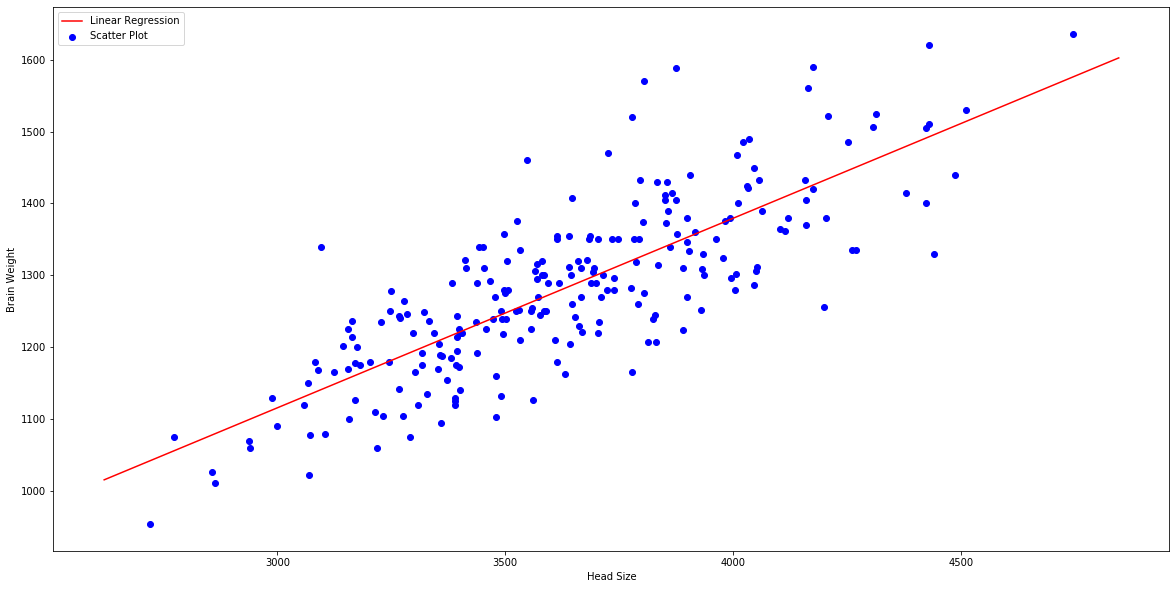

In [22]:
max_x = np.max(X)+100
min_x = np.min(X)-100
x = np.linspace(max_x, min_x, 1000)
y = b0 + b1*x

plt.plot(x,y,color='red',label='Linear Regression')
plt.scatter(X,Y,c='b',label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()

In [24]:
    ss_res = 0.0
    ss_tot = 0.0
    
    for i in range(n):
        y_pred = b0 + b1 * X[i]
        ss_tot += (Y[i]-mean_y)**2
        ss_res += (Y[i]-y_pred)**2
        
    r2 = 1 - (ss_res/ss_tot)
    print(r2)

0.6393117199570003


In [26]:
## Using Scikit Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape(len(X),1)

#X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

reg = LinearRegression()
reg = reg.fit(X,Y)
Y_pred = reg.predict(X)

mse = mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)
print(mse)
print(r2_score)
#print("R-squared :",r2_score(y_test, y_predictions))

5201.3840280023305
0.639311719957
